In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np

In [4]:
def Machine(x, w, b):
  y_hat = (w * x) + b
  return y_hat

In [5]:
x = np.array([1, 3, 5, 7, 9])
w = 2
b = 1

In [6]:
Machine(x, w, b)

array([ 3,  7, 11, 15, 19])

In [7]:
def Gradient(x, y, w, b):
  y_hat = Machine(x, w, b)

  dw = np.mean((y - y_hat) * (-2 * x))
  db = np.mean((y - y_hat) * (-2))

  return dw, db

In [8]:
y = np.array([2, 4, 6, 8, 10])

dw, db = Gradient(x, y, w, b)

In [9]:
print('dw :', dw)
print('db :', db)

dw : 66.0
db : 10.0


In [10]:
def Learning(x, y, w, b, step):
  dw, db = Gradient(x, y, w, b)

  uw = w - step * dw
  ub = b - step * db
  
  return uw, ub

In [11]:
step = 0.05

uw, ub = Learning(x, y, w, b, step)

In [12]:
print('Updated_w :', uw)
print('Updated_b :', ub)

Updated_w : -1.3000000000000003
Updated_b : 0.5


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'

DATA = pd.read_csv(url)

In [15]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [16]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


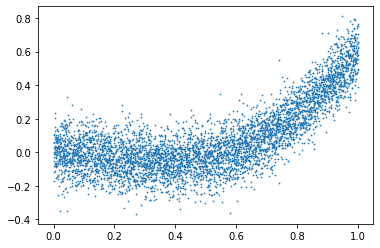

In [17]:
plt.scatter(DATA.inputs, DATA.outputs, s=0.5)
plt.show()

In [18]:
w = 2
b = 3
step = 0.5

In [19]:
for i in range(1500):
  uw, ub = Learning(DATA.inputs, DATA.outputs, w, b, step)
  w = uw
  b = ub

In [20]:
print(f'Learned_w : {w:.3f}')
print(f'Learned_b : {b:.3f}')

Learned_w : 0.505
Learned_b : -0.170


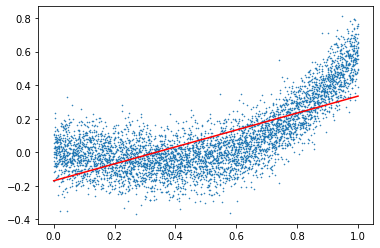

In [21]:
X = np.linspace(0, 1, 100)
Y = (w * X) + b

plt.scatter(DATA.inputs, DATA.outputs, s = 0.3)
plt.plot(X, Y, '-r', linewidth = 1.5)
plt.show()

In [22]:
def Gradient(x, y, w, b):
  y_hat = Machine(x, w, b)

  dw = np.mean((y - y_hat) * (-2 * x))
  db = np.mean((y - y_hat) * (-2))

  Loss = np.mean((y - y_hat) **2)

  return dw, db, Loss

In [23]:
def Learning(x, y, w, b, step):
  dw, db, Loss = Gradient(x, y, w, b)

  uw = w - step * dw
  ub = b - step * db

  Loss = Loss
  
  return uw, ub, Loss

In [24]:
w = 2
b = 3
step = 0.001
Error = []

In [25]:
for i in range(0, 1500):
  uw, ub, Loss = Learning(x, y, w, b, step)

  w = uw
  b = ub
  Error.append(Loss)

In [26]:
Error[:10]

[57.0,
 49.664304,
 43.285763887871994,
 37.739478145364856,
 32.916843958395035,
 28.723430359321576,
 25.077128908081722,
 21.90654569546297,
 19.149603177796617,
 16.75232446165789]

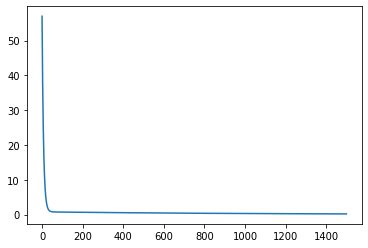

In [27]:
plt.plot(Error)
plt.show()

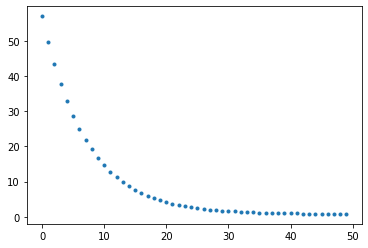

In [28]:
plt.plot(Error[:50], '.')
plt.show()

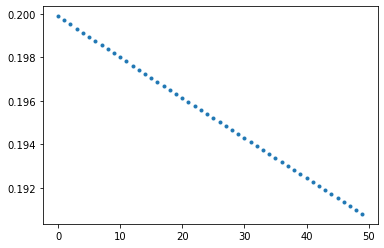

In [29]:
plt.plot(Error[1450:1500], '.')
plt.show()